In [1]:
import pandas as pd

label_column = "Survived"

X_test = pd.read_csv("./data/test.csv")

raw_train = pd.read_csv("./data/train.csv")
y_train = raw_train["Survived"]

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_train = raw_train.copy()


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_train, X_train["Survived"]):
    train_set = X_train.loc[train_index]
    val_set = X_train.loc[test_index]

In [6]:
from sklearn.ensemble import RandomForestClassifier

y = train_set["Survived"]
y_val = val_set["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_set[features])
X_val = pd.get_dummies(val_set[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_val)

#submission = pd.read_csv('../input/titanic/gender_submission.csv')
#submission['Survived'] = survived
#submission.to_csv('submission.csv', index=False)

In [318]:
has_cabin = (X_train["Cabin"].map(lambda cabin: 1 if str(cabin) != "nan" else 0))
X_train = X_train.drop("Cabin", axis=1)
X_train["Cabin"] = has_cabin

In [319]:
is_female = (X_train["Sex"].map(lambda sex: 1 if str(sex) != "female" else 0))
X_train = X_train.drop("Sex", axis=1)
X_train["Sex"] = is_female

In [45]:
X_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [322]:
columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]
X_train = X_train[columns]
median_age = X_train["Age"].median()
#X_train["Age"].dropna()
#X_train["Fare"].fillna(0, inplace=True)
X_train["Age"].fillna(0, inplace=True)

In [321]:
X_train["Cabin"].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [271]:
corr_matrix = X_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [323]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_train, X_train["Survived"]):
    train_set = X_train.loc[train_index]
    val_set = X_train.loc[test_index]

In [324]:
X_train = train_set.drop("Survived", axis=1)
y_train = train_set["Survived"].copy()
X_val = val_set.drop("Survived", axis=1)
y_val = val_set["Survived"].copy()

In [310]:
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,male,28.0,0,0,56.4958,NaN,S
481,2,male,28.0,0,0,0.0000,NaN,S
527,1,male,28.0,0,0,221.7792,C95,S
855,3,female,18.0,0,1,9.3500,NaN,S
801,2,female,31.0,1,1,26.2500,NaN,S


<AxesSubplot:>

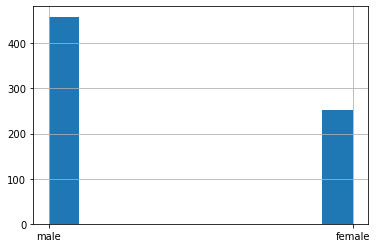

In [175]:
X_train["Sex"].hist()

<AxesSubplot:>

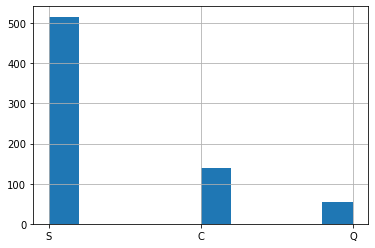

In [208]:
X_train["Embarked"].hist()

<AxesSubplot:>

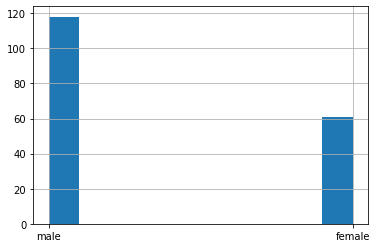

In [176]:
X_val["Sex"].hist()

<AxesSubplot:>

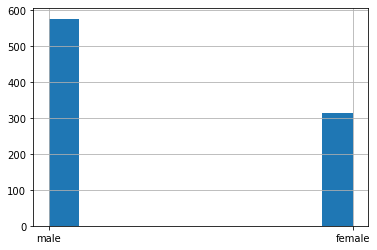

In [177]:
raw_train["Sex"].hist()

In [14]:
#final_columns = ["Cabin", "Fare", "Sex", "Pclass", "Age"]
#X_train_final = X_train[final_columns]

In [15]:
X_train_final.head()

NameError: name 'X_train_final' is not defined

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
min_max = MinMaxScaler()

In [17]:
 num_scaled = min_max.fit_transform(X_train_final[["Fare", "Age"]])

NameError: name 'X_train_final' is not defined

In [18]:
num_scaled

NameError: name 'num_scaled' is not defined

In [334]:
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer([
    ("num", StandardScaler(),["Age"]),
    ("cat", OneHotEncoder(), ["Sex","Parch", "Cabin", "Pclass"])
])

X_train_prepared = col_trans.fit_transform(X_train)
X_val_prepared = col_trans.fit_transform(X_val)

In [312]:
X_train_prepared

<712x142 sparse matrix of type '<class 'numpy.float64'>'
	with 4272 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(random_state=42)

In [15]:
pred = sgd_clf.predict(X_val)

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(y_val, pred)

array([[31, 79],
       [10, 59]], dtype=int64)

In [8]:
print(precision_score(y_val, predictions))
print(recall_score(y_val, predictions))

0.8035714285714286
0.6521739130434783


In [154]:
y_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=3, method="decision_function")

In [155]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)

In [121]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...]

In [122]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

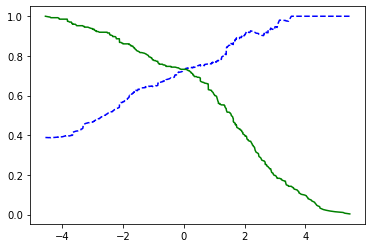

In [156]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

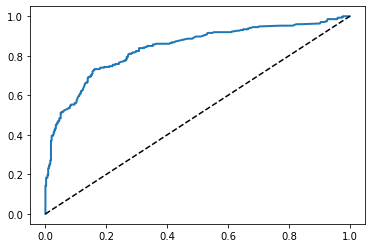

In [157]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
plt.show()

In [192]:
std_trans = ColumnTransformer([
    ("num", StandardScaler(),["Age"]),
    ("cat", OneHotEncoder(), ["Sex", "Pclass", "Parch",])
])

In [193]:
X_train_std = std_trans.fit_transform(X_train)
y_pred_std = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3)

In [194]:
confusion_matrix(y_train, y_pred_std)

array([[364,  75],
       [ 73, 200]], dtype=int64)

In [161]:
print(precision_score(y_train, y_pred_std))
print(recall_score(y_train, y_pred_std))

0.7272727272727273
0.7326007326007326


In [35]:
y_scores_std = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3, method="decision_function")

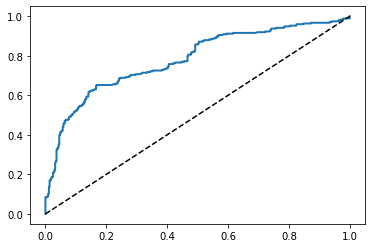

In [87]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_std)
plot_roc_curve(fpr,tpr)
plt.show()

In [328]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_train_forest = cross_val_predict(forest_clf, X_train_std, y_train, cv=5)

In [329]:
print(precision_score(y_train, y_train_forest))
print(recall_score(y_train, y_train_forest))

0.7735042735042735
0.663003663003663
